In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Train.csv")

In [3]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bbc516630>,
      dtype=object)

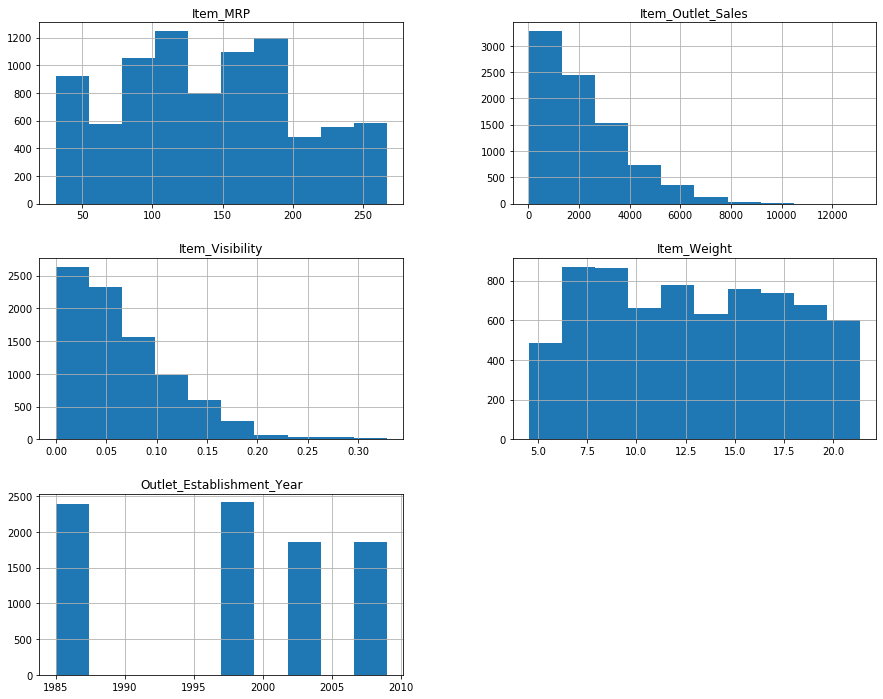

In [5]:
df.hist(figsize=(15,12))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
corr_matrix = df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [8]:
df.Item_Identifier.value_counts()

FDG33    10
FDW13    10
NCQ06     9
NCJ30     9
FDX04     9
         ..
FDN52     1
FDK57     1
DRF48     1
FDO33     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [9]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
df.Item_Fat_Content = df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content = df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content = df.Item_Fat_Content.replace('low fat','Low Fat')

In [11]:
df.Item_Fat_Content = df.Item_Fat_Content.astype('category')
df.Item_Identifier = df.Item_Identifier.astype('category')
df.Item_Type = df.Item_Type.astype('category')
df.Outlet_Identifier = df.Outlet_Identifier.astype('category')
df.Outlet_Size = df.Outlet_Size.astype('category')
df.Outlet_Location_Type = df.Outlet_Location_Type.astype('category')
df.Outlet_Size = df.Outlet_Size.astype('category')
df.Outlet_Type = df.Outlet_Type.astype('category')

In [12]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

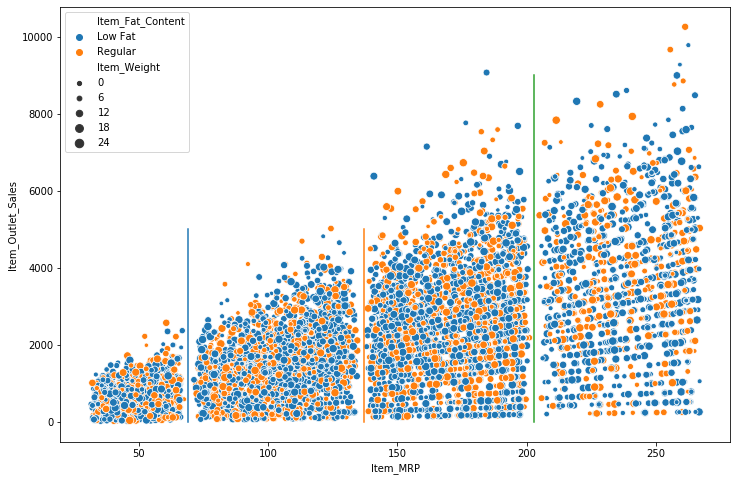

In [13]:
fig,axes = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue = 'Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

In [14]:
df.Item_MRP=pd.cut(df.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type Item_MRP Outlet_Identifier  \
0                  Dairy        d            OUT049   
1            Soft Drinks        a            OUT018   
2                   Meat        c            OUT049   
3  Fruits and Vegetables        c            OUT010   
4              Household        a            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

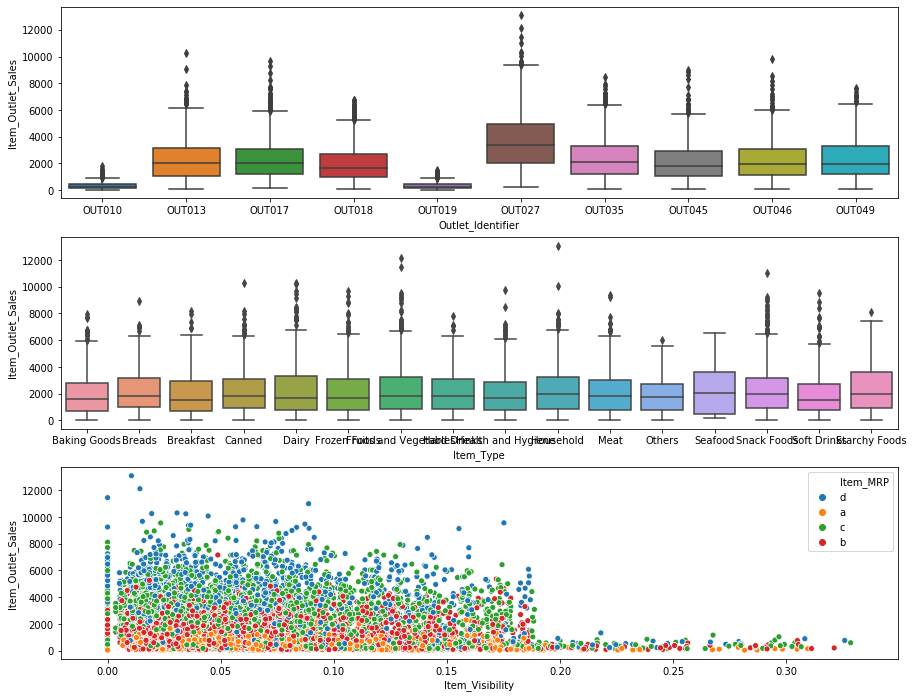

In [15]:
fig,axes = plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue = 'Item_MRP',data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax = axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax = axes[0],data=df)

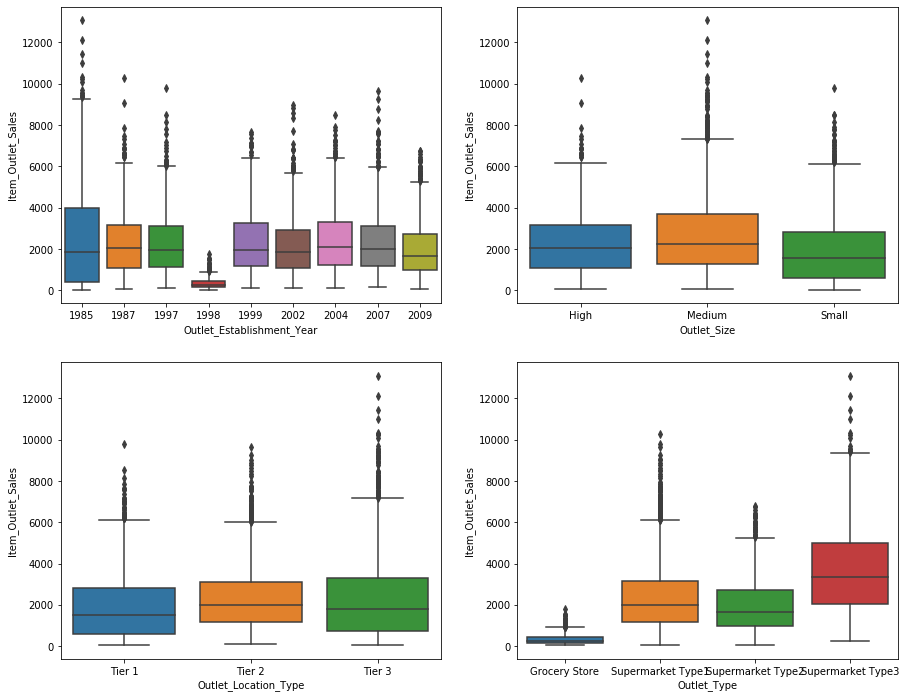

In [16]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

In [17]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

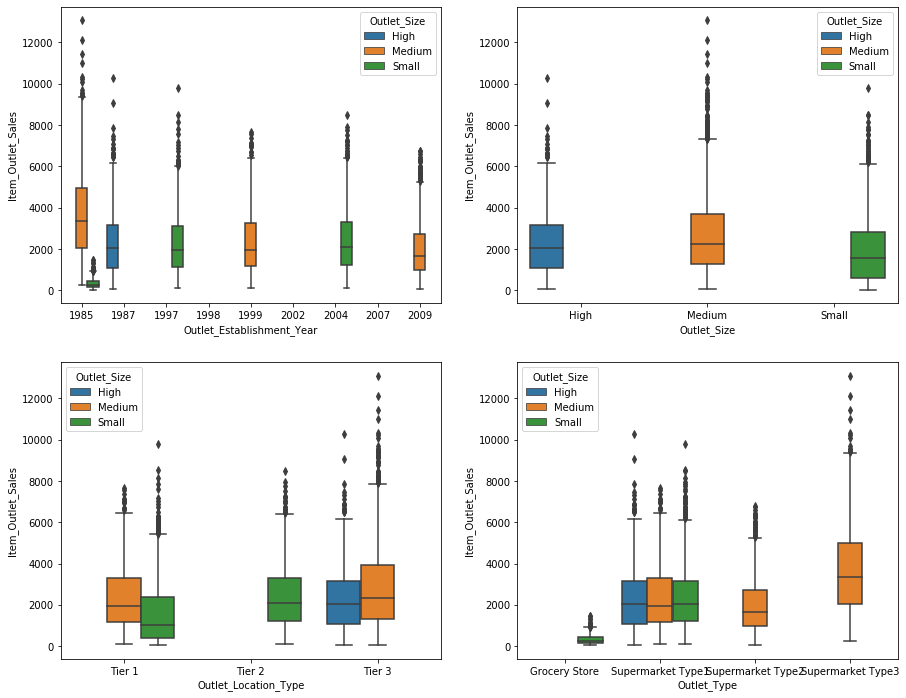

In [18]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

In [19]:
data=df[attributes]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_MRP                     8523 non-null category
Outlet_Type                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Size                  6113 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null category
Item_Type                    8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(6), float64(1), int64(1)
memory usage: 185.0 KB


Item_MRP        Outlet_Type Outlet_Location_Type Outlet_Size  \
0        d  Supermarket Type1               Tier 1      Medium   
1        a  Supermarket Type2               Tier 3      Medium   
2        c  Supermarket Type1               Tier 1      Medium   
3        c      Grocery Store               Tier 3         NaN   
4        a  Supermarket Type1               Tier 3        High   

   Outlet_Establishment_Year Outlet_Identifier              Item_Type  \
0                       1999            OUT049                  Dairy   
1                       2009            OUT018            Soft Drinks   
2                       1999            OUT049                   Meat   
3                       1998            OUT010  Fruits and Vegetables   
4                       1987            OUT013              Household   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

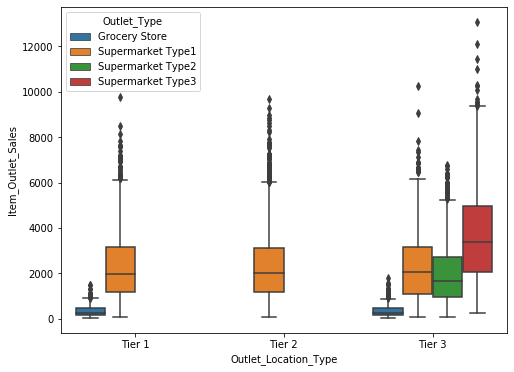

In [20]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=data)


In [21]:
data[data.Outlet_Size.isnull()]

Item_MRP        Outlet_Type Outlet_Location_Type Outlet_Size  \
3           c      Grocery Store               Tier 3         NaN   
8           b  Supermarket Type1               Tier 2         NaN   
9           c  Supermarket Type1               Tier 2         NaN   
25          a  Supermarket Type1               Tier 2         NaN   
28          a      Grocery Store               Tier 3         NaN   
...       ...                ...                  ...         ...   
8502        d  Supermarket Type1               Tier 2         NaN   
8508        c  Supermarket Type1               Tier 2         NaN   
8509        d      Grocery Store               Tier 3         NaN   
8514        a  Supermarket Type1               Tier 2         NaN   
8519        b  Supermarket Type1               Tier 2         NaN   

      Outlet_Establishment_Year Outlet_Identifier              Item_Type  \
3                          1998            OUT010  Fruits and Vegetables   
8                          2002            OUT045           Frozen Foods   
9                          2007            OUT017           Frozen Foods   
25                         2007            OUT017              Household   
28                         1998            OUT010                  Dairy   
...                         ...               ...                    ...   
8502                       2002            OUT045              Household   
8508                       2002            OUT045  Fruits and Vegetables   
8509                       1998            OUT010  Fruits and Vegetables   
8514                       2002            OUT045                 Canned   
8519                       2002            OUT045           Baking Goods   

      Item_Outlet_Sales  
3              732.3800  
8             1076.5986  
9             4710.5350  
25             838.9080  
28             178.4344  
...                 ...  
8502          3020.0688  
8508          2587.9646  
8509           424.7804  
8514           468.7232  
8519           549.2850  

[2410 rows x 8 columns]

In [22]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [23]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [24]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Identifier'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Identifier
Tier 1                Grocery Store      OUT019               528
                      Supermarket Type1  OUT046               930
                                         OUT049               930
Tier 2                Supermarket Type1  OUT035               930
                                         OUT045               929
                                         OUT017               926
Tier 3                Grocery Store      OUT010               555
                      Supermarket Type1  OUT013               932
                      Supermarket Type2  OUT018               928
                      Supermarket Type3  OUT027               935
Name: Outlet_Identifier, dtype: int64

In [25]:
data[data['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
OUT049      0
OUT046      0
OUT035      0
OUT027      0
OUT019      0
OUT018      0
OUT013      0
Name: Outlet_Identifier, dtype: int64

In [26]:
data = data.apply(func,axis=1)

In [27]:
data.head()

Item_MRP        Outlet_Type Outlet_Location_Type Outlet_Size  \
0        d  Supermarket Type1               Tier 1      Medium   
1        a  Supermarket Type2               Tier 3      Medium   
2        c  Supermarket Type1               Tier 1      Medium   
3        c      Grocery Store               Tier 3         NaN   
4        a  Supermarket Type1               Tier 3        High   

   Outlet_Establishment_Year Outlet_Identifier              Item_Type  \
0                       1999            OUT049                  Dairy   
1                       2009            OUT018            Soft Drinks   
2                       1999            OUT049                   Meat   
3                       1998            OUT010  Fruits and Vegetables   
4                       1987            OUT013              Household   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [28]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_MRP                     8523 non-null object
Outlet_Type                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Size                  6113 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null object
Item_Type                    8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 532.8+ KB


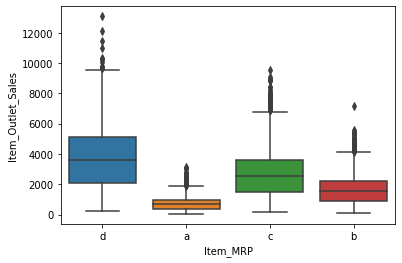

In [29]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data =data)

In [30]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()


7158.6816

In [31]:
data[data.Item_Outlet_Sales==7158.6816]

Item_MRP        Outlet_Type Outlet_Location_Type Outlet_Size  \
7737        d  Supermarket Type3               Tier 3      Medium   
7796        b  Supermarket Type3               Tier 3      Medium   

      Outlet_Establishment_Year Outlet_Identifier  Item_Type  \
7737                       1985            OUT027     Breads   
7796                       1985            OUT027  Household   

      Item_Outlet_Sales  
7737          7158.6816  
7796          7158.6816

In [32]:
data=data.drop(index=7796)
data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].max()

5582.733

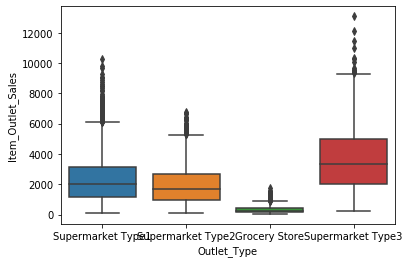

In [33]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

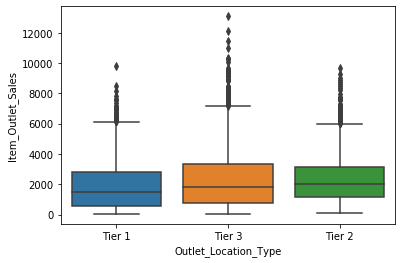

In [34]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

In [35]:
data[data.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()


9779.9362

In [36]:
data[data['Item_Outlet_Sales']==9779.9362]

Item_MRP        Outlet_Type Outlet_Location_Type Outlet_Size  \
4289        d  Supermarket Type1               Tier 1       Small   

      Outlet_Establishment_Year Outlet_Identifier           Item_Type  \
4289                       1997            OUT046  Health and Hygiene   

      Item_Outlet_Sales  
4289          9779.9362

In [37]:
data=data.drop(index=4289)

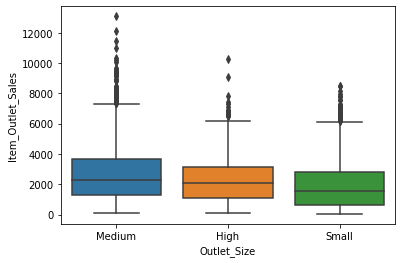

In [38]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)

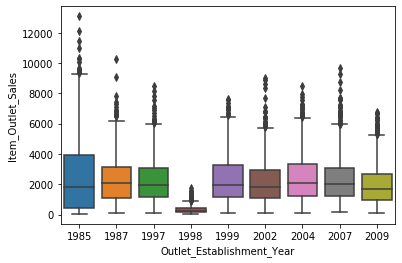

In [39]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

In [40]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('category')
data.Item_Type = data.Item_Type.astype('category')
data.Outlet_Identifier = data.Outlet_Identifier.astype('category')
data.Outlet_Size = data.Outlet_Size.astype('category')
data.Outlet_Location_Type = data.Outlet_Location_Type.astype('category')
data.Outlet_Size = data.Outlet_Size.astype('category')
data.Outlet_Type = data.Outlet_Type.astype('category')
data_label=data.Item_Outlet_Sales

In [41]:
data.Item_MRP = data.Item_MRP.astype('category')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8521 entries, 0 to 8522
Data columns (total 8 columns):
Item_MRP                     8521 non-null category
Outlet_Type                  8521 non-null category
Outlet_Location_Type         8521 non-null category
Outlet_Size                  6111 non-null category
Outlet_Establishment_Year    8521 non-null category
Outlet_Identifier            8521 non-null category
Item_Type                    8521 non-null category
Item_Outlet_Sales            8521 non-null float64
dtypes: category(7), float64(1)
memory usage: 513.5 KB


Item_MRP        Outlet_Type Outlet_Location_Type Outlet_Size  \
0        d  Supermarket Type1               Tier 1      Medium   
1        a  Supermarket Type2               Tier 3      Medium   
2        c  Supermarket Type1               Tier 1      Medium   
3        c      Grocery Store               Tier 3         NaN   
4        a  Supermarket Type1               Tier 3        High   

  Outlet_Establishment_Year Outlet_Identifier              Item_Type  \
0                      1999            OUT049                  Dairy   
1                      2009            OUT018            Soft Drinks   
2                      1999            OUT049                   Meat   
3                      1998            OUT010  Fruits and Vegetables   
4                      1987            OUT013              Household   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [42]:
data_dummy=pd.get_dummies(data.iloc[:,0:6])
data_dummy['Item_Outlet_Sales']=data_label
data_dummy.shape

(8521, 34)

In [43]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data_dummy,test_size = 0.20,random_state=2019)

In [44]:
train.shape,test.shape

((6816, 34), (1705, 34))

In [45]:
train_label= train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
from sklearn.metrics import mean_squared_error
predict_lr=lr.predict(test)
mse=mean_squared_error(test_label,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1171.0519181717757

In [48]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')
lr_score_cross=np.sqrt(-score)
np.mean(lr_score_cross),np.std(lr_score_cross)

(1149.5765506506036, 32.03142236959447)